In [1]:
import pandas as pd
from datetime import datetime
from dateutil.parser import parse
import re
from matplotlib import pyplot as plt

In [2]:

df = pd.DataFrame(pd.read_csv('../data/all-history-actions.csv'))

fake_now = parse("6/1/2022").date()

fake_now

datetime.date(2022, 6, 1)

In [3]:
df['date_object'] = df['date'].apply(lambda x : parse(x).date())

df_past = df.loc[df['date_object'] > fake_now]

df_past.describe()



,id,action,branch,date,date_object
count,6692,6692,6692,6692,6692
unique,2371,1581,4,1417,49
top,S3018,Senate concurred,House,2022-06-09T18:51:38.670Z,2022-06-09
freq,67,551,3666,399,895


In [4]:
referred_to_committee = re.compile("(referred) to the committee", re.IGNORECASE)
reported_from_committee = re.compile("(reported)", re.IGNORECASE)
ways_and_means = re.compile("(ways) and means", re.IGNORECASE)
enacted = re.compile("(enacted)", re.IGNORECASE)
signed = re.compile("(signed)", re.IGNORECASE)



stages = [referred_to_committee, reported_from_committee, ways_and_means, enacted, signed]


def match_stage(x):
  for s in stages: 
    found = s.search(x)
    if found is not None: 
      return found.group().lower() 



In [5]:


df_actions= df_past.groupby('id').nth(-1)

df_actions['stage'] = df_actions['action'].apply(lambda x: match_stage(x))

df_actions.groupby("stage").count()

,action,branch,date,date_object
stage,,,,
enacted,30,30,30,30
referred to the committee,293,293,293,293
reported,39,39,39,39
signed,57,57,57,57
ways and means,2,2,2,2


In [6]:
 
df['stage'] = df['action'].apply(lambda x: match_stage(x))


dates = sorted(df.date_object.unique())


In [7]:


dds = df[df['stage'].isnull() == False]


In [39]:
from cProfile import label


colors = {
  "enacted": 'r',
  "referred to the committee": 'g',
  "reported": 'y',
  "signed": 'b',
  "ways and means": 'c'
}

def get_color(series): 
  return colors[series]

dds_plot = dds #.loc[(dds.stage != 'referred to the committee') & (dds.stage != 'reported')]



dds_plot['x1'] = dds_plot[dds_plot.stage == 'enacted']['date']
dds_plot['x2'] = dds_plot[dds_plot.stage == 'ways and means']['date']
dds_plot['x3'] = dds_plot[dds_plot.stage == 'signed']['date']


y = dds_plot['id']
x = dds_plot['date']

color = dds_plot['stage'].apply(lambda x: colors[x])



/tmp/ipykernel_61199/3886239326.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dds_plot['x1'] = dds_plot[dds_plot.stage == 'enacted']['date']
/tmp/ipykernel_61199/3886239326.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dds_plot['x2'] = dds_plot[dds_plot.stage == 'ways and means']['date']
/tmp/ipykernel_61199/3886239326.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

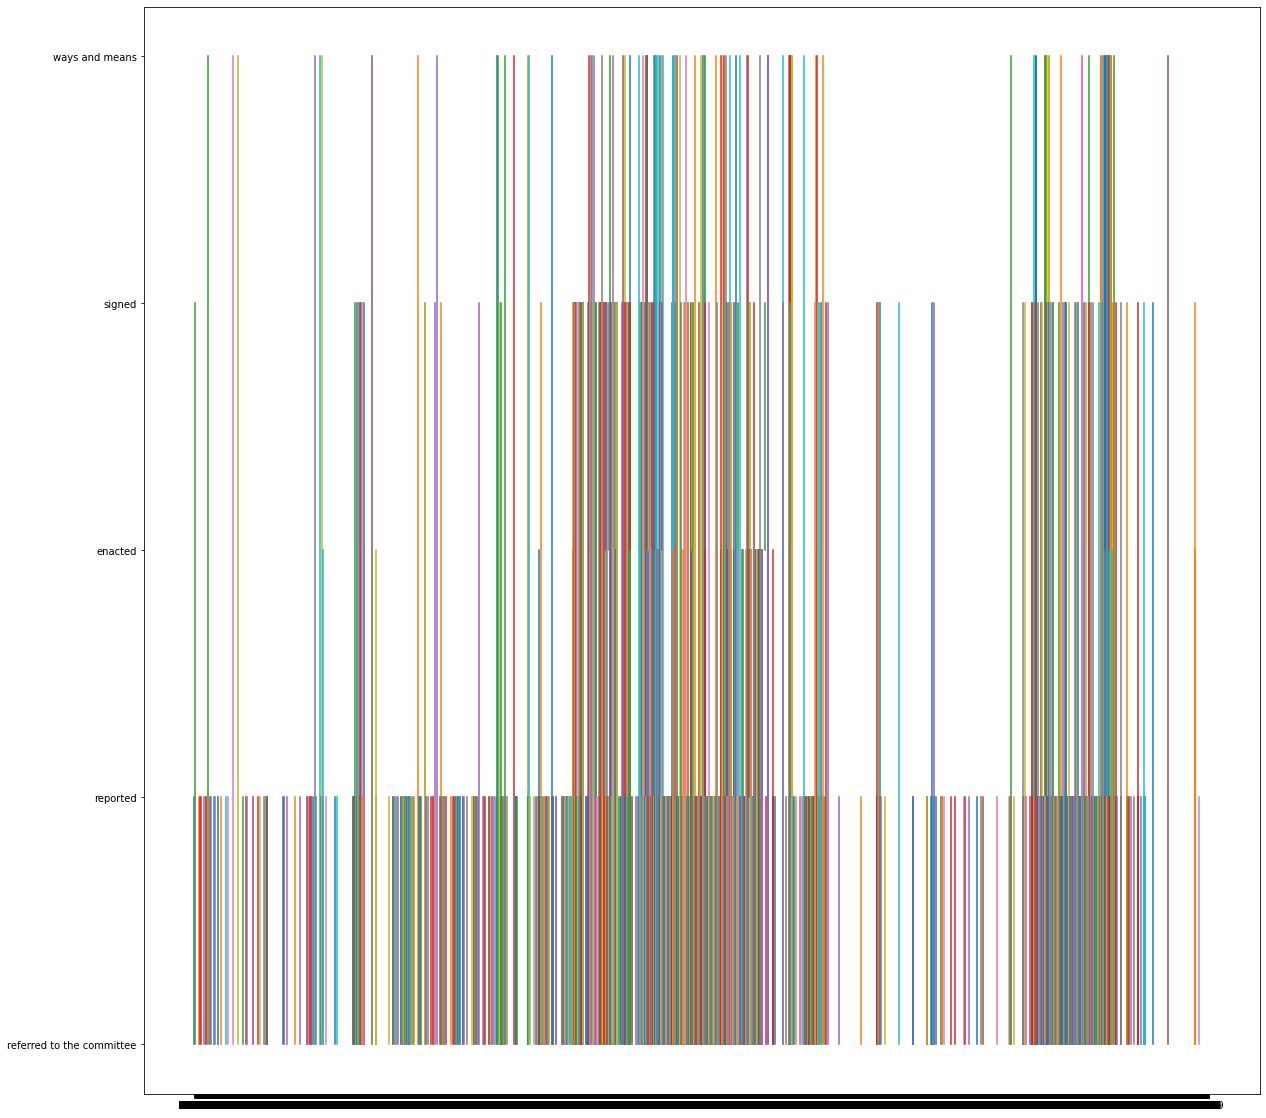

In [40]:

fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)

x1 = dds_plot.x1

group_ids = dds_plot.groupby('id')

for i, g in group_ids: 
  plt.plot([b for b in g.id], [b for b in g.stage])

# plt.scatter(x, y, c=color)

plt.show()

